# Code for Section 2: Foundations of the Fourier transform
## This code is for learning the Fourier transform.

### mikexcohen.com

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Complex numbers
---


In [2]:
# writing the complex number as real + imaginary
z = 4 + 1j*3
print(z)

# using the function complex
z = complex(4,3)    # this way
z = complex('4+3j') # or this way
print(z)


(4+3j)
(4+3j)


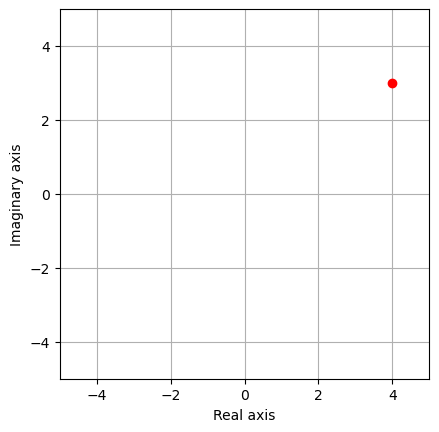

In [3]:
# plot the complex number on the complex plane

plt.plot(np.real(z),np.imag(z),'ro')

# some plotting touch-ups
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

In [4]:
# compute the magnitude of the complex number using Pythagorean theorem
mag = np.sqrt( np.real(z)**2 + np.imag(z)**2 )

# or using abs
mag = np.abs(z)

print( 'The magnitude is',mag )

The magnitude is 5.0


In [5]:
# compute the angle of the complex number using Pythagorean theorem
phs = math.atan( np.imag(z) / np.real(z) )

# or using abs
phs = np.angle(z)

print( 'The angle is',phs )

The angle is 0.6435011087932844



---
# VIDEO: Euler's formula
---


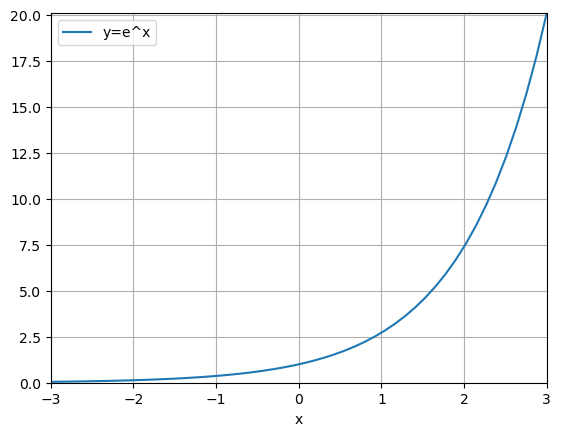

In [6]:
x = np.linspace(-3,3,num=50)

plt.plot(x,np.exp(x),label='y=e^x')

# some plotting touch-ups
plt.axis([min(x),max(x),0,np.exp(x[-1])])
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.show()


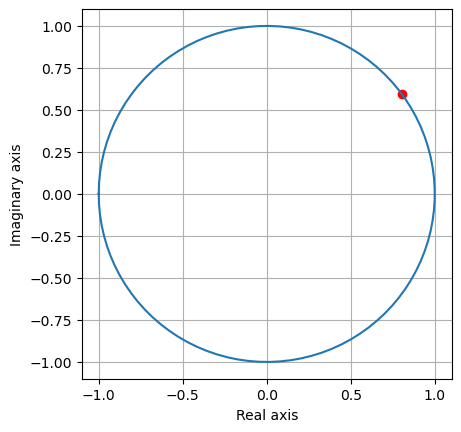

In [7]:
# [cos(k),sin(k)] is on the unit circle for any real k

# define k (any real number)
k = 2/np.pi

# Euler's notation
euler = np.exp(1j*k)

# plot dot
plt.plot(np.cos(k),np.sin(k),'ro')

# draw unit circle for reference
x = np.linspace(-np.pi,np.pi,num=100)
plt.plot(np.cos(x),np.sin(x))

# some plotting touch-ups
plt.axis('square')
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

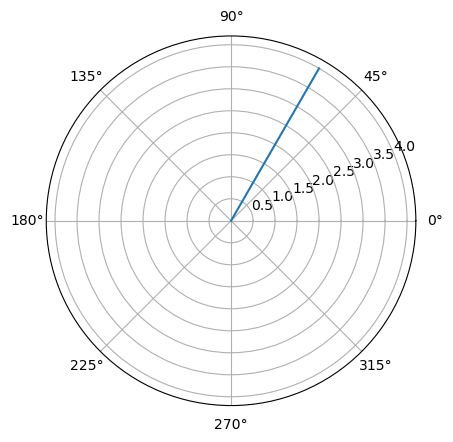

In [8]:
# Euler's formula with arbitrary vector magnitude

m = 4; # magnitude
k = np.pi/3; # phase
compnum = m*np.exp( 1j*k );

# extract magnitude and angle
mag = np.abs(compnum);
phs = np.angle(compnum);

plt.polar([phs,phs],[0,mag])
plt.show()



---
# VIDEO: sine waves and complex sine waves
---



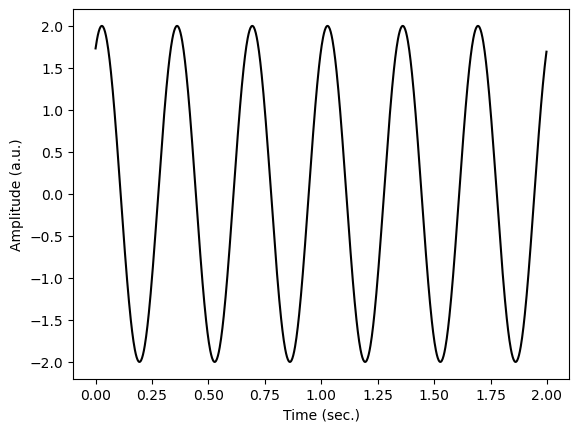

In [9]:
# simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave param.eters
freq = 3;    # frequency in Hz
ampl = 2;    # amplitude in a.u.
phas = np.pi/3; # phase in radians

# generate the sine wave
sinewave = ampl * np.sin( 2*np.pi * freq * time + phas )

plt.plot(time,sinewave,'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

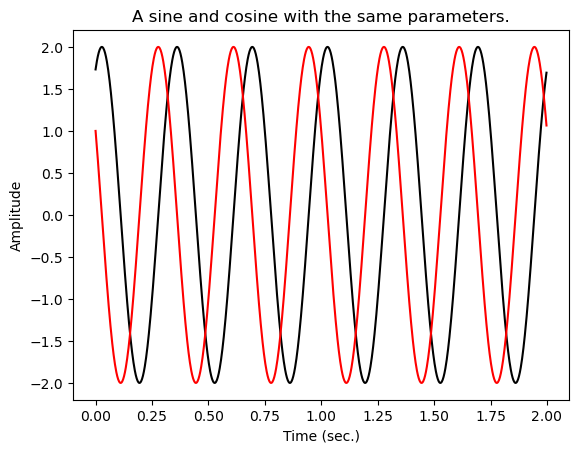

In [10]:
# sine and cosine are the same but for a phase shift

# generate the sine wave
sinewave = ampl * np.sin( 2*np.pi * freq * time + phas )
coswave  = ampl * np.cos( 2*np.pi * freq * time + phas )

plt.plot(time,sinewave,'k',label='sine')
plt.plot(time,coswave,'r',label='cosine')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('A sine and cosine with the same parameters.')
plt.show()

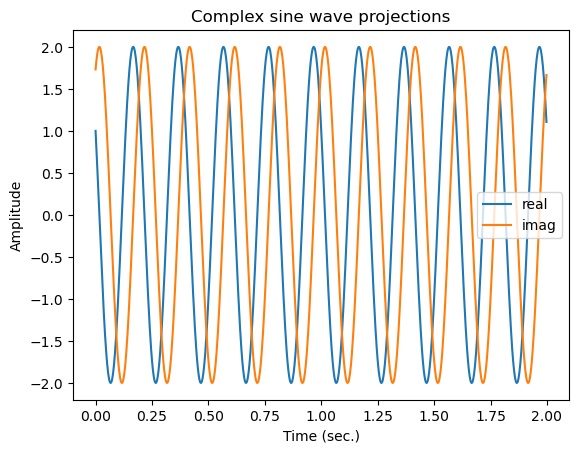

In [11]:
# complex sine waves

# general simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq = 5;    # frequency in Hz
ampl = 2;    # amplitude in a.u.
phas = np.pi/3; # phase in radians

# generate the sine wave
csw = ampl * np.exp( 1j* (2*np.pi * freq * time + phas) );

# plot the results
plt.plot(time,np.real(csw),label='real')
plt.plot(time,np.imag(csw),label='imag')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('Complex sine wave projections')
plt.legend()
plt.show()


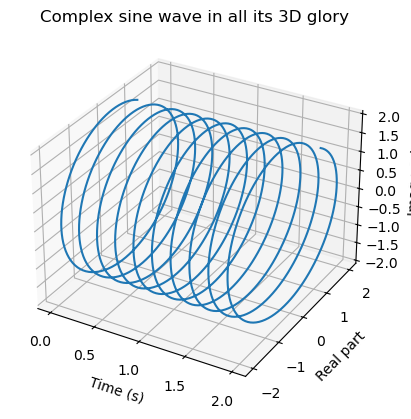

In [12]:
# now show in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(time,np.real(csw),np.imag(csw))
ax.set_xlabel('Time (s)'), ax.set_ylabel('Real part'), ax.set_zlabel('Imag part')
ax.set_title('Complex sine wave in all its 3D glory')
plt.show()


---
# VIDEO: The dot product
---


In [13]:
# two vectors
v1 = [ 1, 2, 3 ];
v2 = [ 3, 2, 1 ];

# compute the dot product
dp = sum( np.multiply(v1,v2) )

print('The dot product is',dp)

The dot product is 10


In [14]:
# dot products of sine waves

# general simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq1 = 5;    # frequency in Hz
freq2 = 5;    # frequency in Hz

ampl1 = 2;    # amplitude in a.u.
ampl2 = 2;    # amplitude in a.u.

phas1 = np.pi/2; # phase in radians
phas2 = np.pi/2; # phase in radians

# generate the sine wave
sinewave1 = ampl1 * np.sin( 2*np.pi * freq1 * time + phas1 );
sinewave2 = ampl2 * np.sin( 2*np.pi * freq2 * time + phas2 );

# compute dot product
dp = np.dot(sinewave1,sinewave2);

# print result
print('dp =',dp)

dp = 2000.0


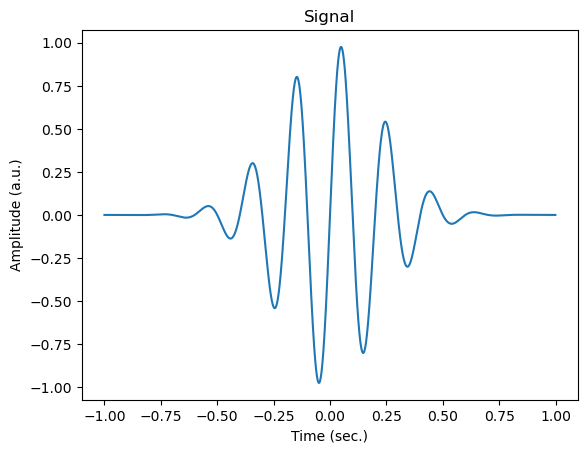

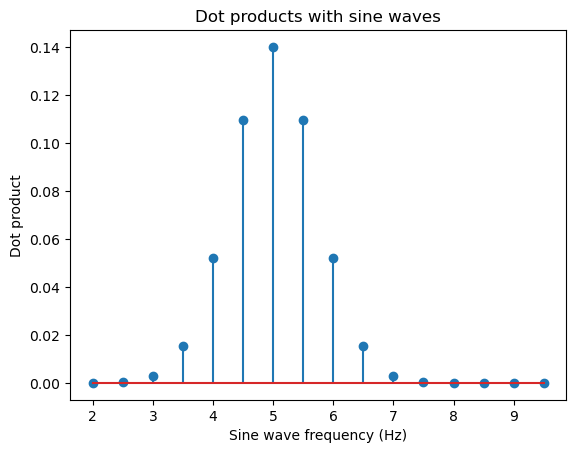

In [15]:
# with a signal

# phase of signal
theta = 0*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)

# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(len(dps)):

    # create sine wave
    sinew = np.sin( 2*np.pi*sinefrex[fi]*time)

    # compute dot product
    dps[fi] = np.dot( sinew,signal ) / len(time)


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()


---
# VIDEO: The complex dot product
---


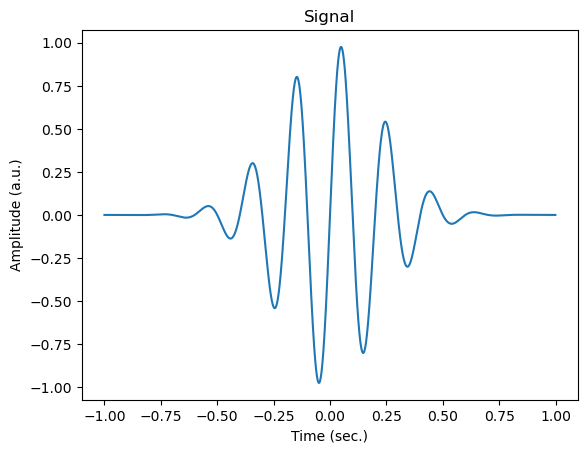

C:\Users\Ngoc\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Ngoc\anaconda3\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Ngoc\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


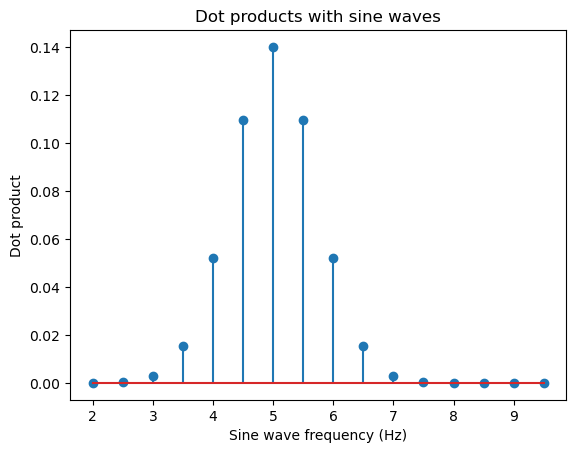

In [16]:
# phase of signal
theta = 0*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)


# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex),dtype=complex)

# loop over sine waves
for fi in range(len(dps)):

    # create sine wave
    sinew = np.exp( 1j*2*np.pi*sinefrex[fi]*time )

    # compute dot product
    dps[fi] = np.abs( np.vdot( sinew,signal ) / len(time) )


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

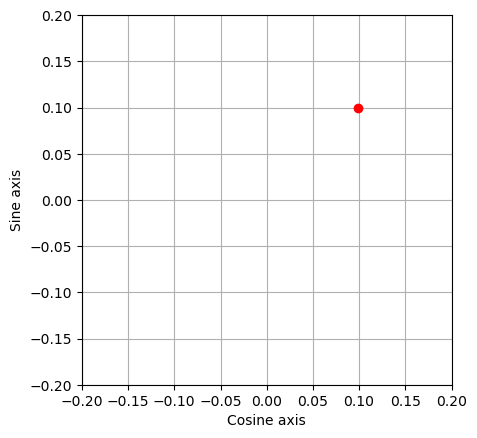

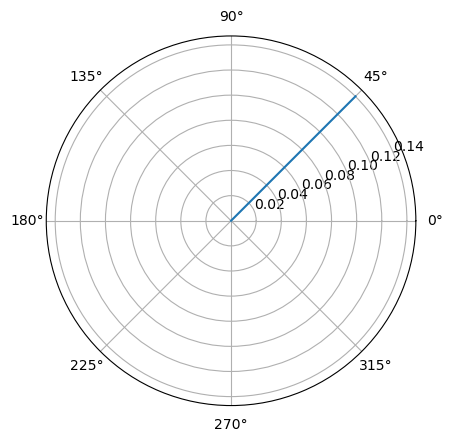

In [17]:
# in more detail...

# phase of signal
theta = 1*np.pi/4;

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1)
signal = np.multiply(sinew,gauss)

# create sine and cosine waves
sinew = np.sin( 2*np.pi*5*time )
cosnw = np.cos( 2*np.pi*5*time )

# compute dot products
dps = np.dot( sinew,signal ) / len(time)
dpc = np.dot( cosnw,signal ) / len(time)

# combine sine and cosine into complex dot product
dp_complex = complex(dpc,dps) # cos/sin were swapped in the video
mag = np.abs(dp_complex)
phs = np.angle(dp_complex)

# and plot
plt.plot( dpc , dps ,'ro')
plt.xlabel('Cosine axis')
plt.ylabel('Sine axis')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
plt.show()

# draw a line using polar notation
plt.polar([phs,phs],[0,mag])
plt.show()

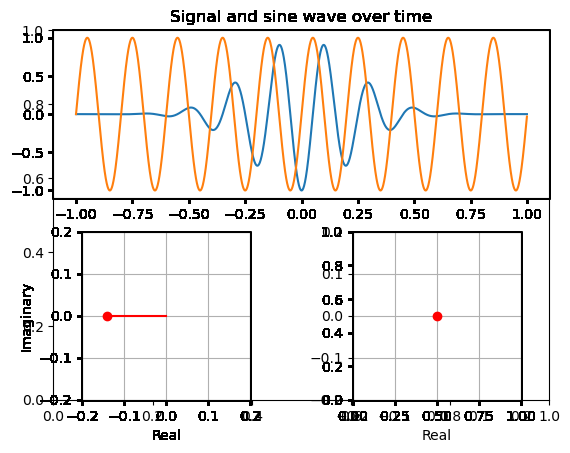

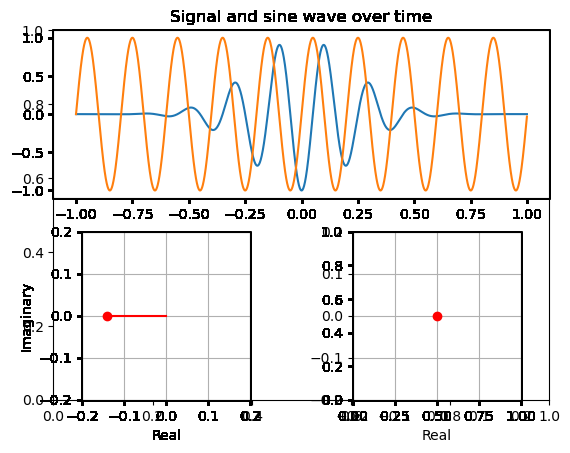

In [18]:
## illustration of the effect of phase offsets on dot products

# create complex sine wave
csw = np.exp( 1j*2*np.pi*5*time )
rsw = np.sin(    2*np.pi*5*time )

# specify range of phase offsets for signal
phases = np.linspace(0,7*np.pi/2,num=100)


for phi in range(0,len(phases)):

    # create signal
    sinew  = np.sin(2*np.pi*5*time + phases[phi])
    gauss  = np.exp( (-time**2) / .1)
    signal = np.multiply(sinew,gauss)

    # compute complex dot product
    cdp = np.sum( np.multiply(signal,csw) ) / len(time)

    # compute real-valued dot product
    rdp = sum( np.multiply(signal,rsw) ) / len(time)

    # plot signal and real part of sine wave
    pl.cla() # wipe the figure
    plt.subplot2grid((2,2), (0, 0), colspan=2)
    plt.plot(time,signal)
    plt.plot(time,rsw)
    plt.title('Signal and sine wave over time')

    # plot complex dot product
    plt.subplot2grid((2,2), (1, 0))
    plt.plot(np.real(cdp),np.imag(cdp),'ro')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])
    plt.plot([0,np.real(cdp)],[0,np.imag(cdp)],'r')


    # draw normal dot product
    plt.subplot2grid((2,2), (1, 1))
    plt.plot(rdp,0,'ro')
    plt.xlabel('Real')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])


    # show plot
    display.clear_output(wait=True)
    display.display(pl.gcf())
    ttime.sleep(.01)
